In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]

train_path = './Trained'
valid_path = './Tested'

In [3]:
folders = glob('./Trained/*')

In [4]:
folders

['./Trained\\Ripen', './Trained\\Rotten']

In [11]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 2, activation = 'softmax'))
#use 7 for notes

In [12]:
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./Trained',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('./Tested',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8 images belonging to 2 classes.


In [16]:
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - ETA: 0s - loss: 0.7133 - accuracy: 0.5000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000257A68189D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

In [17]:
r.history

{'loss': [0.7133232355117798, 7.373724937438965],
 'accuracy': [0.5, 0.5],
 'val_loss': [7.0234479904174805, 0.5464134216308594],
 'val_accuracy': [0.5, 0.5]}

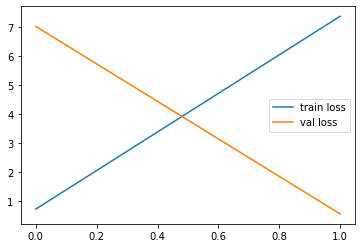

"\n# plot the accuracy\nplt.plot(r.history['accuracy'], label='train acc')\nplt.plot(r.history['val_accuracy'], label='val acc')\nplt.legend()\nplt.show()\nplt.savefig('AccVal_acc')\n"

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
'''
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
'''

In [19]:
from tensorflow.keras.models import load_model

Classifier.save('paper_model_Classifier.h5')

In [20]:
y_pred = Classifier.predict(test_set)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [21]:
y_pred

array([[0.5559083 , 0.44409168],
       [0.5579685 , 0.44203153],
       [0.7662707 , 0.23372933],
       [0.76071286, 0.23928714],
       [0.5565019 , 0.443498  ],
       [0.55505884, 0.44494116],
       [0.75666   , 0.24334006],
       [0.7395059 , 0.26049414]], dtype=float32)

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('paper_model_Classifier.h5')

In [36]:
img=image.load_img('b.jpg',target_size=(224,224))

In [38]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [39]:
result = Classifier.predict(test_image)
result

array([[1.0000000e+00, 1.2256554e-23]], dtype=float32)

In [40]:
a=np.argmax(model.predict(test_image), axis=1)

In [41]:
a

array([0], dtype=int64)

In [42]:
a[0]

0

In [43]:
model.predict(test_image)

array([[1.0000000e+00, 1.2256554e-23]], dtype=float32)

In [48]:
img_width, img_height = 320, 240

img = image.load_img('b.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print(classes)

# predicting multiple images at once
img = image.load_img('b.jpg', target_size=(img_width, img_height))
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = model.predict_classes(images, batch_size=10)

# print the classes, the images belong to
print(classes)

AttributeError: 'Sequential' object has no attribute 'predict_classes'